# Import Modules

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn  as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api  as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error


%matplotlib inline

# Constants

# Fish Weight Estimation using Multivariable LinearRegression

# Gather Data

In [2]:
data = pd.read_csv('Fish.csv')

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
data[data['Weight']==0].index

Int64Index([40], dtype='int64')

In [7]:
data = data.drop(labels=40, axis = 0)

In [8]:
target = np.log(data['Weight'])
list(target)

[5.488937726156687,
 5.66988092298052,
 5.8289456176102075,
 5.8944028342648505,
 6.063785208687608,
 6.1092475827643655,
 6.214608098422191,
 5.966146739123692,
 6.1092475827643655,
 6.214608098422191,
 6.163314804034641,
 6.214608098422191,
 6.214608098422191,
 5.8289456176102075,
 6.396929655216146,
 6.396929655216146,
 6.551080335043404,
 6.551080335043404,
 6.413458957167357,
 6.476972362889683,
 6.354370040797351,
 6.529418838262226,
 6.429719478039138,
 6.522092798170152,
 6.551080335043404,
 6.586171654854675,
 6.579251212010101,
 6.570882962339584,
 6.745236349484363,
 6.907755278982137,
 6.824373670043086,
 6.86171134048073,
 6.829793737512425,
 6.882437470997847,
 6.856461984594587,
 3.6888794541139363,
 4.23410650459726,
 4.356708826689592,
 4.465908118654584,
 4.787491742782046,
 4.700480365792417,
 4.787491742782046,
 5.0106352940962555,
 4.976733742420574,
 5.075173815233827,
 4.941642422609304,
 5.075173815233827,
 5.1298987149230735,
 5.081404364984463,
 5.298317366548

In [9]:
 species_list = list(data['Species'])

In [10]:
data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [11]:
species = data['Species'].unique()

In [12]:
Bream = [1 if specy=='Bream' else 0 for specy in species_list ]
Roach = [1 if specy=='Roach' else 0 for specy in species_list]
Whitefish = [1 if specy=='Whitefish' else 0 for specy in species_list]
Parkki = [1 if specy=='Parkki' else 0 for specy in species_list]
Perch= [1 if specy=='Perch' else 0 for specy in species_list]
Pike = [1 if specy=='Pike' else 0 for specy in species_list]
Smelt = [1 if specy=='Smelt' else 0 for specy in species_list]

data['Bream'] = Bream 
data['Roach'] = Roach
data['Whitefish'] = Whitefish
data['Parkki'] = Parkki
data['Perch'] = Perch
data['Pike'] = Pike
data['Smelt'] = Smelt
    
    
    
        

In [13]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,0,1
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,0,1
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,0,1
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,0,1


In [14]:
data['Bream'].value_counts()

0    123
1     35
Name: Bream, dtype: int64

In [15]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [16]:
df = data.drop(['Species'], axis=1)

In [17]:
df

,Weight,Length1,Length2,Length3,Height,Width,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,0,1
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,0,1
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,0,1
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,0,1


In [18]:
df.isnull().any()

Weight       False
Length1      False
Length2      False
Length3      False
Height       False
Width        False
Bream        False
Roach        False
Whitefish    False
Parkki       False
Perch        False
Pike         False
Smelt        False
dtype: bool

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 158
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     158 non-null    float64
 1   Length1    158 non-null    float64
 2   Length2    158 non-null    float64
 3   Length3    158 non-null    float64
 4   Height     158 non-null    float64
 5   Width      158 non-null    float64
 6   Bream      158 non-null    int64  
 7   Roach      158 non-null    int64  
 8   Whitefish  158 non-null    int64  
 9   Parkki     158 non-null    int64  
 10  Perch      158 non-null    int64  
 11  Pike       158 non-null    int64  
 12  Smelt      158 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 17.3 KB


In [20]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232,0.221519,0.120253,0.037975,0.069620,0.354430,0.107595,0.088608
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010,0.416589,0.326292,0.191743,0.255315,0.479861,0.310853,0.285080
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.count()

Weight       158
Length1      158
Length2      158
Length3      158
Height       158
Width        158
Bream        158
Roach        158
Whitefish    158
Parkki       158
Perch        158
Pike         158
Smelt        158
dtype: int64

# Data Explore And Visualization

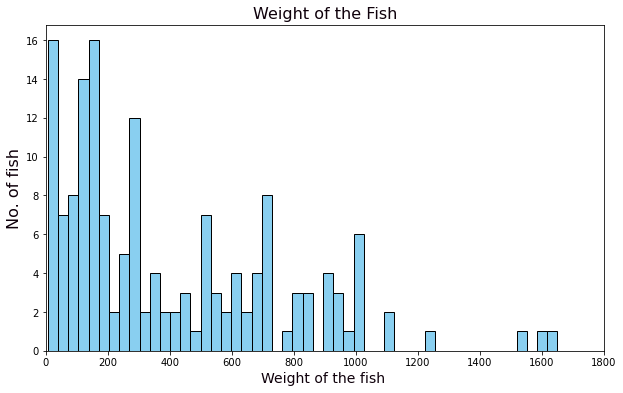

In [22]:
#Weight of the  fishh

plt.figure(figsize= (10, 6))
plt.hist(df['Weight'], bins = 50, ec= 'black', color= "#89cff0")
plt.title('Weight of the Fish', fontdict={'fontsize': 16, 'color': '#0F010B'})
plt.xlabel('Weight of the fish ', fontdict={'fontsize': 14, 'color': '#0F010B'})
plt.ylabel('No. of fish', fontdict={'fontsize': 16, 'color': '#0F010B'})
plt.xlim(0, 1800 )
plt.show()

C:\Users\amar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


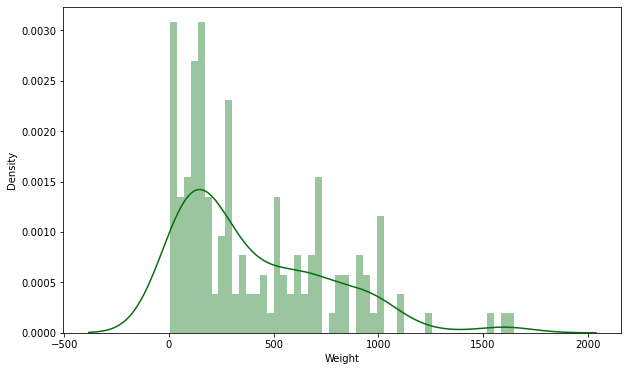

In [23]:
plt.figure(figsize= (10, 6))
sns.distplot(df["Weight"], bins = 50, color= '#04700E', hist= True, kde= True) 
#to ploting probability desity function cureve and histogram together

plt.show()
#color = display coor of chart, hist= False/True = hiding chart, kde = False/TRue = hiding pdf curve

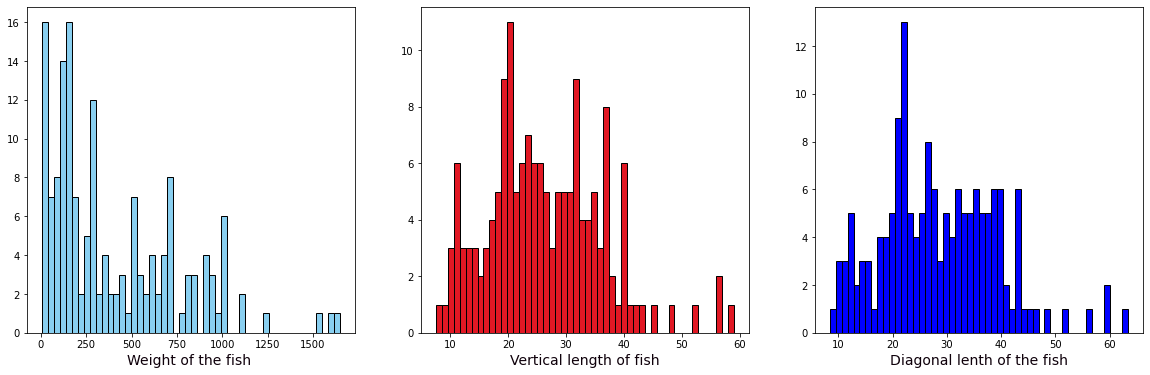

In [24]:
#Weight of the  fishh

plt.figure(figsize= (20, 6))
plt.subplot(1, 3, 1)
plt.hist(df['Weight'], bins = 50, ec= 'black', color= "#89cff0")
plt.xlabel('Weight of the fish ', fontdict={'fontsize': 14, 'color': '#0F010B'})


#verical Length of the fish
plt.subplot(1, 3, 2)
plt.hist(df['Length1'], bins = 50, ec= 'black', color= "#E11824")
plt.xlabel('Vertical length of fish', fontdict={'fontsize': 14, 'color': '#0F010B'})


#diagnal length of fish
plt.subplot(1, 3, 3)
plt.hist(df['Length2'], bins=50, ec= 'black', color = 'blue')
plt.xlabel('Diagonal lenth of the fish',  fontdict={'fontsize': 14, 'color': '#0F010B'})
plt.show()

## CORRELATION
 
## $$ \rho_(xy) = corr(x, y)$$
## $$ -0.1 \leq \rho_(xy) \leq + 1.0 $$

In [25]:
df['Weight'].corr(df['Length1'])

0.915719476592731

In [26]:
df['Weight'].corr(df['Length2'])

0.9186031427305773

In [27]:
df.corr()


,Weight,Length1,Length2,Length3,Height,Width,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654,0.324613,-0.249677,0.072522,-0.188750,-0.038669,0.309536,-0.340754
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684,0.214486,-0.206035,0.049910,-0.207383,-0.041379,0.563078,-0.469780
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201,0.231508,-0.210729,0.052946,-0.207646,-0.039686,0.552326,-0.482218
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189,0.325559,-0.197643,0.052046,-0.200358,-0.109248,0.522374,-0.490803
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401,0.772002,-0.196917,0.048277,-0.001557,-0.194676,-0.103240,-0.493564
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000,0.317903,-0.164752,0.123766,-0.195537,0.141485,0.136558,-0.571167
Bream,0.324613,0.214486,0.231508,0.325559,0.772002,0.317903,1.000000,-0.197220,-0.105983,-0.145921,-0.395253,-0.185224,-0.166328
Roach,-0.249677,-0.206035,-0.210729,-0.197643,-0.196917,-0.164752,-0.197220,1.000000,-0.073455,-0.101136,-0.273945,-0.128376,-0.115280
Whitefish,0.072522,0.049910,0.052946,0.052046,0.048277,0.123766,-0.105983,-0.073455,1.000000,-0.054349,-0.147214,-0.068987,-0.061949
Parkki,-0.188750,-0.207383,-0.207646,-0.200358,-0.001557,-0.195537,-0.145921,-0.101136,-0.054349,1.000000,-0.202690,-0.094984,-0.085294


In [28]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

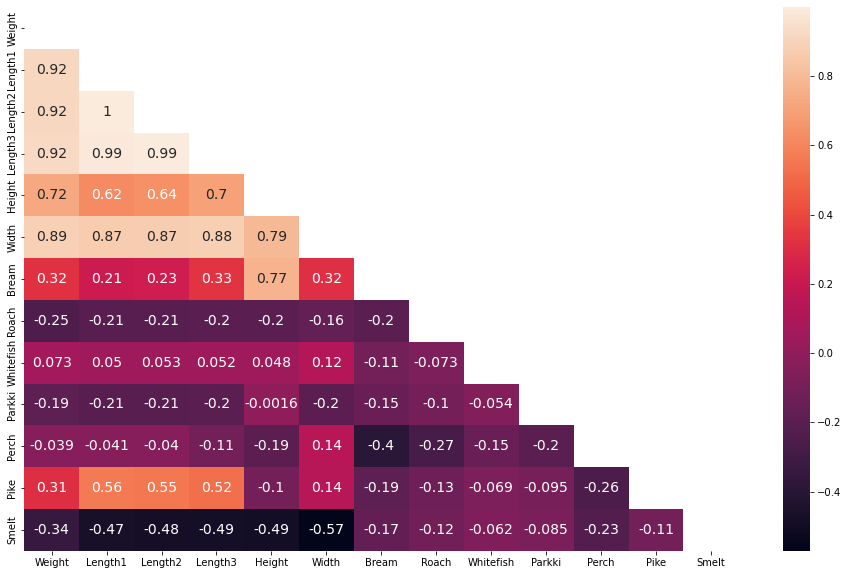

In [29]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), mask= mask, annot= True, annot_kws= {"size": 14})
# sns.set_style("white")    setting the background color behind the heatmape
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.show()

# mask =is the trianle of aaray
# annot = if we need valuen on box in heatmape
# annot_kws = set the value of annote size or fontsize of the value on the box of heatmap 

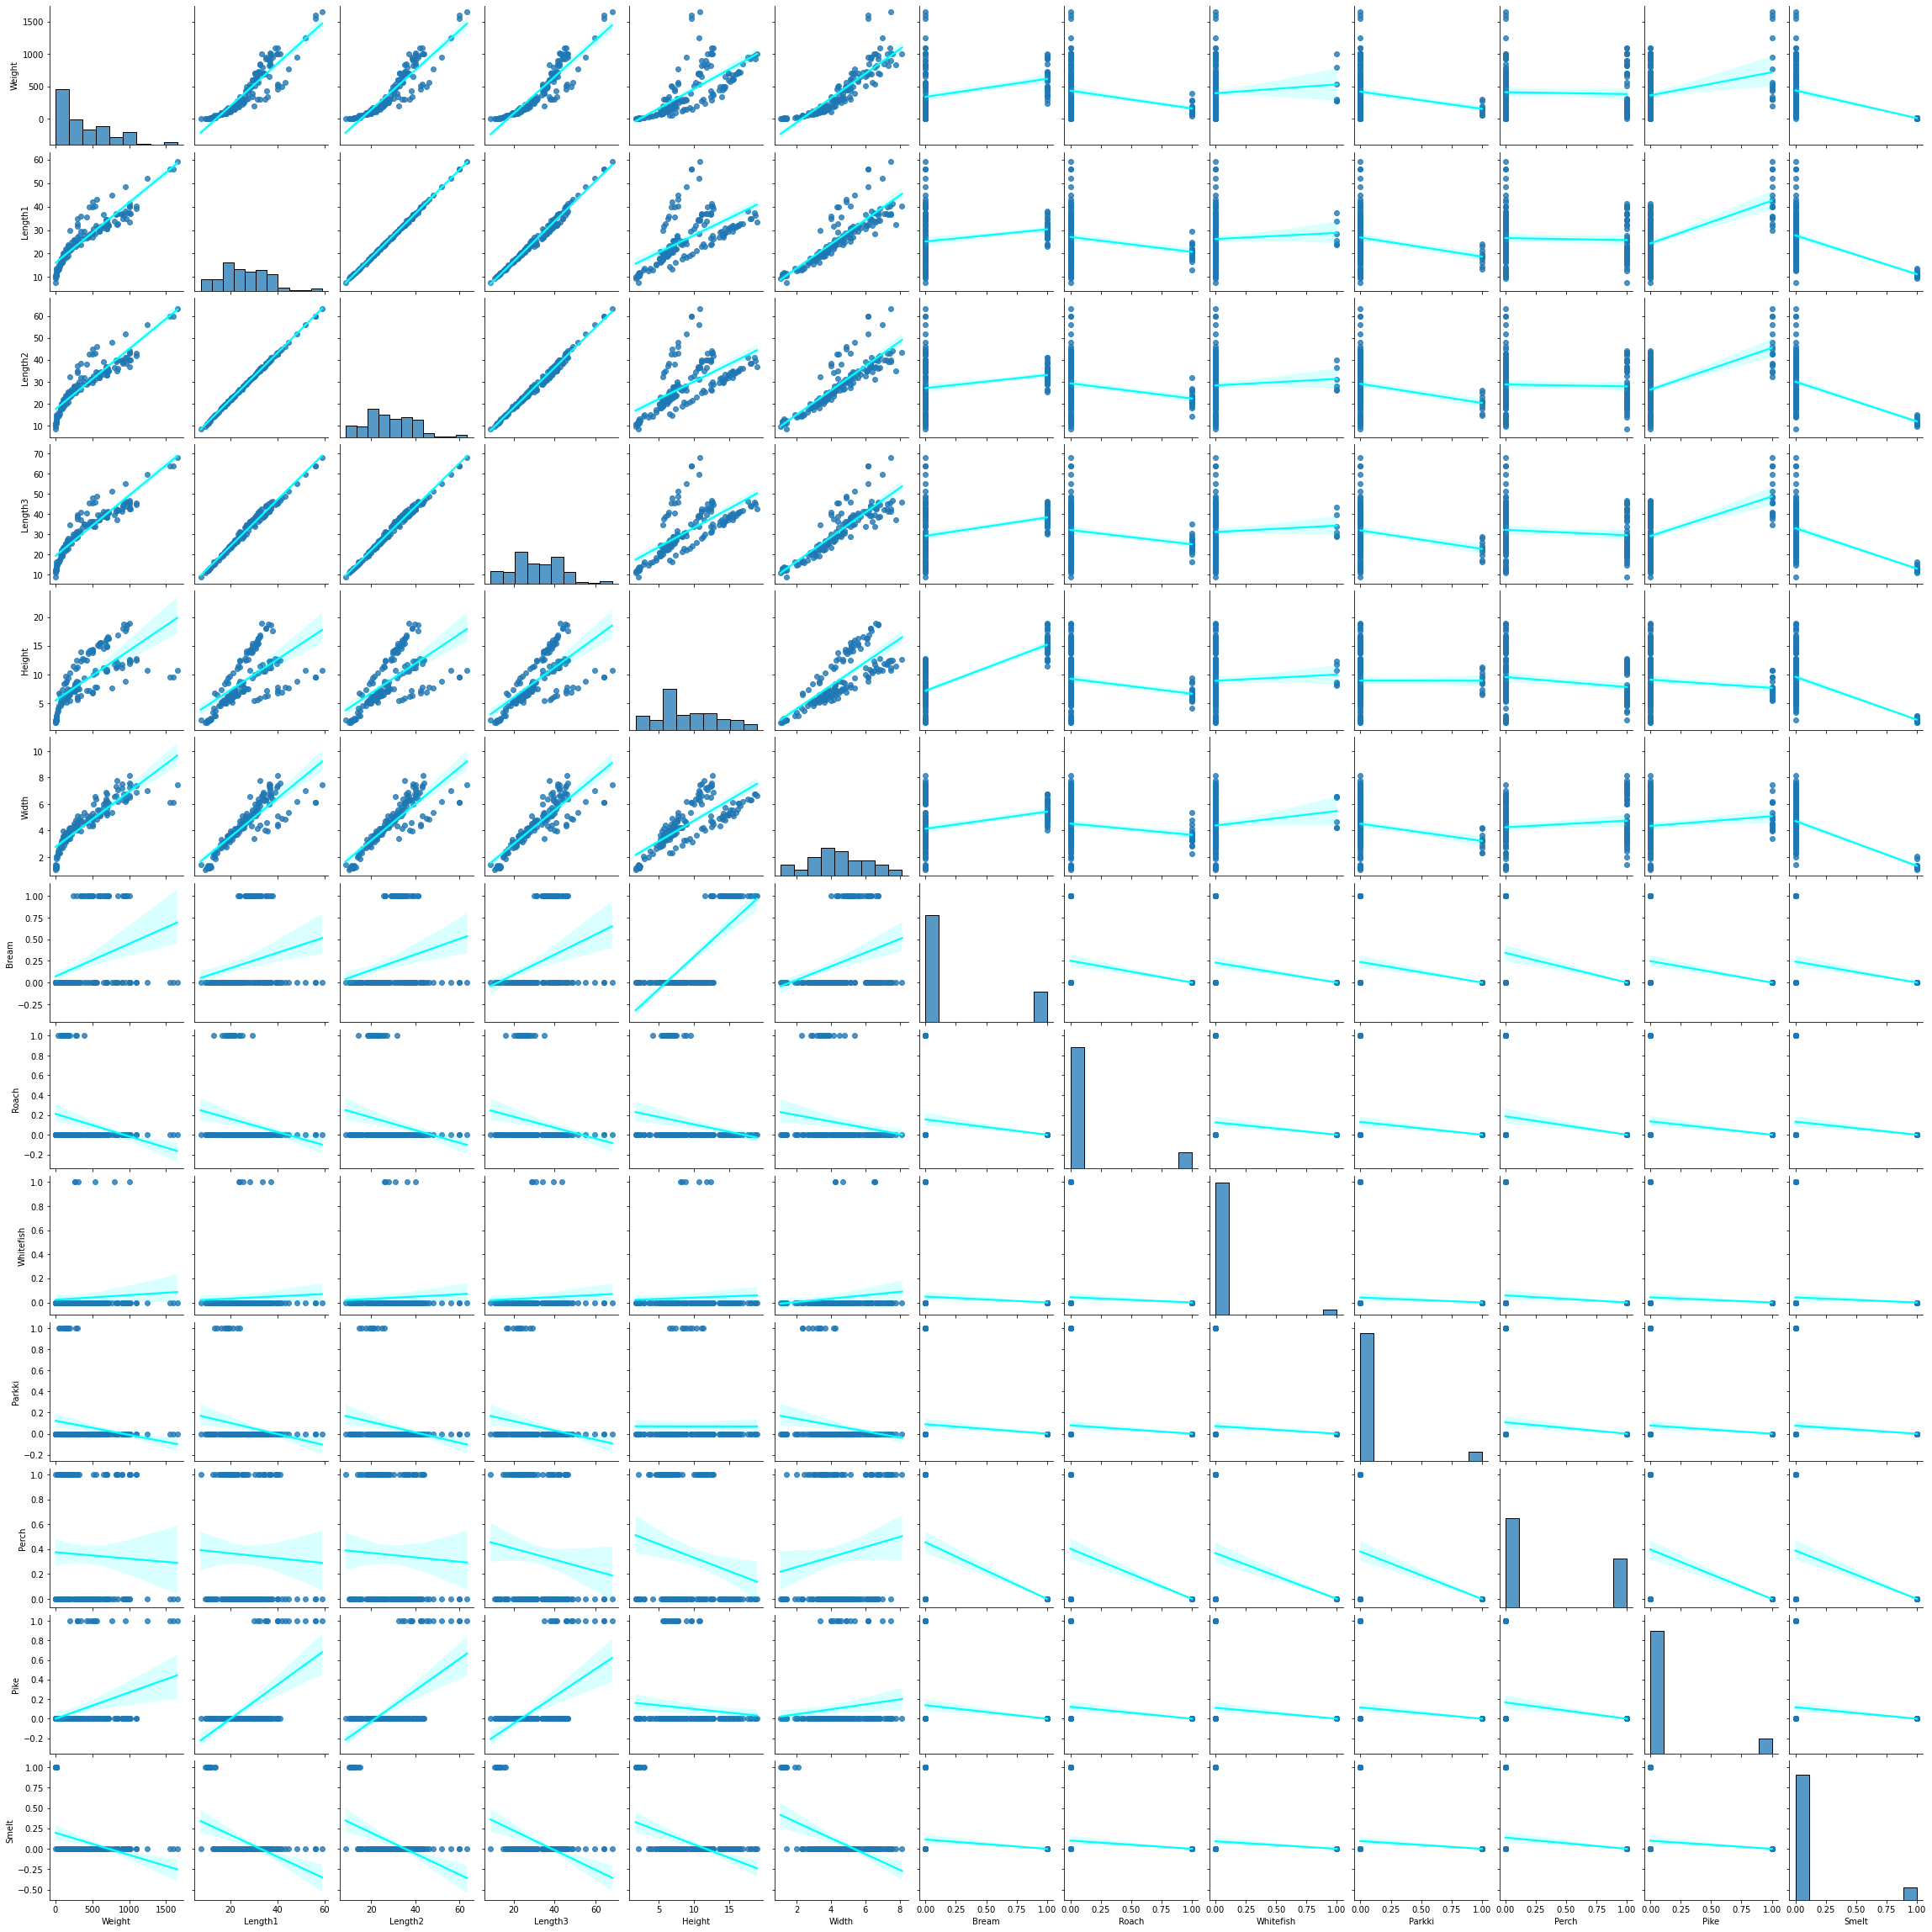

Wall time: 49.7 s


In [30]:
%%time

sns.pairplot(df, kind= 'reg', plot_kws= {'line_kws':{"color": "cyan"}})
plt.show()

In [31]:
weight = df['Weight']
features = df.drop('Weight', axis= 1)
#we have to drop a column so for column axis=1 and axis = 0 for row

X_train, X_test, Y_train, Y_test = train_test_split(features, weight, test_size= 0.3, random_state= 10)



regression = LinearRegression()
regression.fit(X_train, Y_train)


print('testing data r-squared: ', regression.score(X_test, Y_test))
print('trainig data r-squared: ', regression.score(X_train, Y_train))


print('Intercept', regression.intercept_)  #find Intercept
pd.DataFrame(data= regression.coef_, index = X_train.columns, columns= ['coef']) 

testing data r-squared:  0.9029173750456931
trainig data r-squared:  0.9421931385483199
Intercept -856.7498774983535


,coef
Length1,-78.708628
Length2,55.077100
Length3,54.072763
Height,20.964092
Width,-22.708418
Bream,-230.568315
Roach,-7.967705
Whitefish,-30.497206
Parkki,56.831037
Perch,74.316679


In [32]:
X_test.head()

,Length1,Length2,Length3,Height,Width,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt
35,12.9,14.1,16.2,4.1472,2.2680,0,1,0,0,0,0,0
84,19.0,21.0,22.5,5.6925,3.6675,0,0,0,0,1,0,0
48,22.0,24.0,27.2,7.5344,3.8352,0,1,0,0,0,0,0
24,31.9,35.0,40.5,16.2405,5.5890,1,0,0,0,0,0,0
88,20.0,22.0,23.5,6.1100,3.5250,0,0,0,0,1,0,0


In [33]:
Y_test.head()

35     40.0
84    125.0
48    169.0
24    700.0
88    130.0
Name: Weight, dtype: float64

# Checking skew value
## smaller the skew better is model

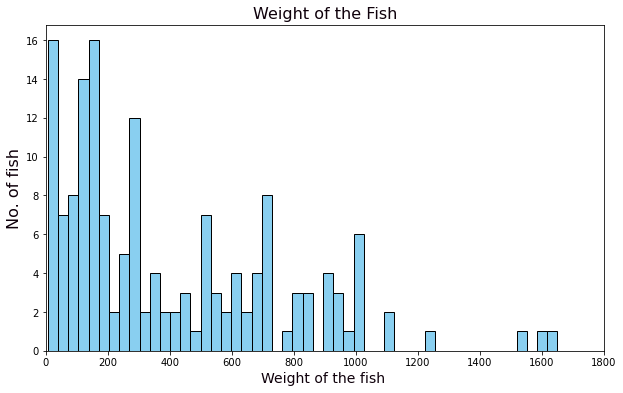

In [34]:
#Weight of the  fishh

plt.figure(figsize= (10, 6))
plt.hist(df['Weight'], bins = 50, ec= 'black', color= "#89cff0")
plt.title('Weight of the Fish', fontdict={'fontsize': 16, 'color': '#0F010B'})
plt.xlabel('Weight of the fish ', fontdict={'fontsize': 14, 'color': '#0F010B'})
plt.ylabel('No. of fish', fontdict={'fontsize': 16, 'color': '#0F010B'})
plt.xlim(0, 1800 )
plt.show()

In [35]:
df['Weight'].skew()

1.1016850135015805

In [36]:
ylog = np.log(df['Weight'])


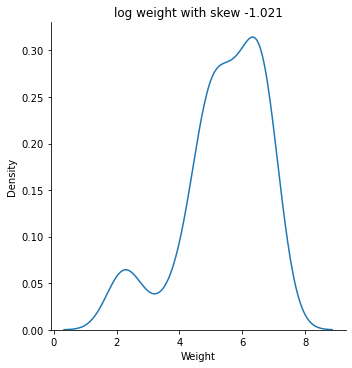

log weight with skew -1.021


In [37]:
sns.displot(ylog, kind= "kde")
plt.title(f'log weight with skew {round(ylog.skew(), 3)}')
plt.show()
#{"hist", "kde", "ecdf"}
print(f'log weight with skew {round(ylog.skew(), 3)}')

In [38]:
prices = np.log(df['Weight']) #use log
features = df.drop('Weight', axis= 1)
#we have to drop a column so for column axis=1 and axis = 0 for row

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size= 0.3, random_state= 10)

regr = LinearRegression()
regr.fit(X_train, Y_train)




print('testing data r-squared: ', regr.score(X_test, Y_test))
print('trainig data r-squared: ', regr.score(X_train, Y_train))

print('Intercept', regr.intercept_)  #find Intercept
pd.DataFrame(data= regr.coef_, index = X_train.columns, columns= ['coef']) # find all cofficients in the dataset
# columns= ['coef'] = name of the coluns


## using log we have higher r-squared, reduce skew in target, better fit

testing data r-squared:  0.9746976728457242
trainig data r-squared:  0.9735055157787665
Intercept 2.1841563559383212


,coef
Length1,0.093249
Length2,-0.210704
Length3,0.181965
Height,0.027324
Width,0.175707
Bream,-0.022646
Roach,0.173079
Whitefish,0.421207
Parkki,0.309008
Perch,0.303375


# Evaluating p-values and coffiecients

In [39]:
#p-value >>if < 0.05>> significant
#p-value >>if > 0.05>> Not significant

x_incl_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, x_incl_const)  #OLS= ortdinary Least square give linear regression model
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

C:\Users\amar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,p-values
const,1.911137,0.000
Length1,0.093249,0.370
Length2,-0.210704,0.126
Length3,0.181965,0.066
Height,0.027324,0.479
Width,0.175707,0.014
Bream,0.250374,0.387
Roach,0.446099,0.000
Whitefish,0.694226,0.000
Parkki,0.582027,0.000


# Valuation Tools

# Multivariable Regression

In [94]:
target = np.log(df['Weight'])
features = df.drop(['Length1', 'Length2', 'Height', 'Bream', 'Pike', 'Weight'], axis=1)
#as we are nt satisfy with  value of above features we droping thoes 

In [68]:
regr = LinearRegression()
regr.fit(features, target)

fitted_value = regr.predict(features)


# Calculating mean square error using sklearn
MSE = mean_squared_error(target, fitted_value)
RMSE = np.sqrt(MSE)
RMSE

0.22471012290372044

In [69]:
features

,Length3,Width,Roach,Whitefish,Parkki,Perch,Smelt
0,30.0,4.0200,0,0,0,0,0
1,31.2,4.3056,0,0,0,0,0
2,31.1,4.6961,0,0,0,0,0
3,33.5,4.4555,0,0,0,0,0
4,34.0,5.1340,0,0,0,0,0
...,...,...,...,...,...,...,...
154,13.4,1.3936,0,0,0,0,1
155,13.5,1.2690,0,0,0,0,1
156,13.8,1.2558,0,0,0,0,1
157,15.2,2.0672,0,0,0,0,1


In [73]:
parametr_stats = features.mean().values.reshape(1, 7)
parametr_stats

array([[31.28037975,  4.42423165,  0.12025316,  0.03797468,  0.06962025,
         0.35443038,  0.08860759]])

In [46]:
parametr_stats[0][0]
# parametr_stats

26.293037974683546

In [74]:

CROSS_L = 0
WIDTH = 1

Roach_IDX = 2
Whitefish_IDX = 3
Parkki_IDX= 4
Perch_IDX = 5
Smelt_IDX = 6


In [75]:
data['Species'].unique()


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [76]:
regr = LinearRegression()
regr.fit(features, target)

fitted_value = regr.predict(features)


# Calculating mean square error using sklearn
MSE = mean_squared_error(target, fitted_value)
RMSE = np.sqrt(MSE)
RMSE

0.22471012290372044

In [85]:
#function for getting log values
def get_log_estimates( l3, w, 
                      Bream = True, 
                      Roach = False,
                      Whitefish = False, 
                      Parkki = False, 
                      Perch = False, 
                      Pike = False,
                      Smelt = False,
                     confidence =True):
    
    #configure parametrs
   
    parametr_stats[0][CROSS_L] = l3
    
    parametr_stats[0][WIDTH] = w
      
    
        
        
    if Roach:
        parametr_stats[0][Roach_IDX] = 1
    else:        
        parametr_stats[0][Roach_IDX] =0
        
    if Whitefish:
        parametr_stats[0][Whitefish_IDX] = 1
    else:        
        parametr_stats[0][Whitefish_IDX] =0
        
    if Parkki:
        parametr_stats[0][Parkki_IDX] = 1
    else:        
        parametr_stats[0][Parkki_IDX] =0
        
    if Perch:
        parametr_stats[0][Perch_IDX] = 1
    else:        
        parametr_stats[0][Perch_IDX] =0
    
    if Smelt:
        parametr_stats[0][Smelt_IDX] = 1
    else:        
        parametr_stats[0][Smelt_IDX] =0
            
            
    
    #make predictio
    log_estimate = regr.predict(parametr_stats)[0]
    
    #calc Range
    if confidence:
        upper_bound = log_estimate + 2*RMSE
        lower_bound = log_estimate - 2*RMSE
        interval = 95
    else:
        upper_bound = log_estimate + RMSE
        lower_bound = log_estimate - RMSE
        interval = 68
    
    
    return log_estimate, upper_bound, lower_bound, interval
    

In [86]:
log_estimate = regr.predict(parametr_stats)
log_estimate  

array([5.40999016])

In [95]:
#function for prediction of weight
def get_Weight_estimate(l3, w, 
                      Roach = False,
                      Whitefish = False, 
                      Parkki = False, 
                      Perch = False,
                       Smelt = True, 
                      confidence =True):
    
    
    
    log_est, upper, lower, conf = get_log_estimates( l3=l3, w=w,           
                      Roach = Roach,
                      Whitefish = Whitefish, 
                      Parkki = Parkki, 
                      Perch = Perch, 
                      Smelt = Smelt,
                     confidence =confidence)

    #convert todays $
    weight_gm = np.e**log_est
    weight_hi = np.e**upper
    weight_low = np.e**lower


    #round the doller value to nearest thousand
    rounded_weight = np.around(weight_gm, 3)
    rounded_hi = np.around(weight_hi, 3)
    rounded_low = np.around(weight_low, 3)

    print(f'The estimated weight in gm  is : {rounded_weight}gm')
    print(f'At {conf}% confidence the valuation arange is,')
    print(f' {rounded_low} gm at lower end {rounded_hi} gm at high end')

# Checking model

In [93]:
get_Weight_estimate( 13.8, 1.25, False, False, False, False, True, False)

The estimated weight in gm  is : 10.417gm
At 68% confidence the valuation arange is,
 8.32 gm at lower end 13.041 gm at high end
